### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
air = pd.read_csv("c:/hse-tasks/2008.csv")
counts = air['UniqueCarrier'].value_counts()
top = counts[:10]
top

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

In [2]:
print(air.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Задание 2:** Построить распределение причин отмены рейсов

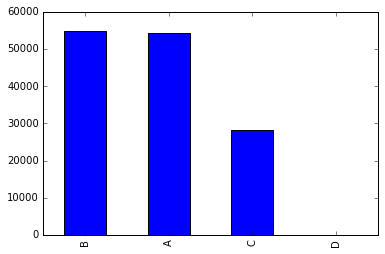

In [3]:
air['CancellationCode'].value_counts().plot(kind='bar')

In [4]:
air['WeatherDelay'].describe()

count    1524735.000000
mean           3.039031
std           19.502874
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         1352.000000
Name: WeatherDelay, dtype: float64

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [5]:
air.pop=air.groupby(['Origin','Dest'])
top_path = air.pop.size().sort_values(ascending = False).iloc[0:1]
top_path

Origin  Dest
SFO     LAX     13788
dtype: int64

In [6]:
air.pop.get_group(('SFO','LAX')).describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [7]:
WeatherDelay = air.groupby('FlightNum')['WeatherDelay'].std().sort_values().iloc[0:5] 
for i in range(0,5): 
    print(air[air['FlightNum'] == WeatherDelay.index[i]][['FlightNum','UniqueCarrier', 'WeatherDelay']])

         FlightNum UniqueCarrier  WeatherDelay
1053561       9740            9E             0
2261496       9740            9E           NaN
3473458       9740            9E           NaN
4712701       9740            9E           NaN
4712702       9740            9E           NaN
4712703       9740            9E           NaN
4712704       9740            9E           NaN
4712705       9740            9E           NaN
4712706       9740            9E           NaN
4712707       9740            9E           NaN
4712708       9740            9E           NaN
5270757       9740            9E           NaN
6895888       9740            9E           NaN
6895889       9740            9E             0
6895890       9740            9E             0
6895891       9740            9E           NaN
6895892       9740            9E             0
6895893       9740            9E           NaN
6895894       9740            9E           NaN
6895895       9740            9E             0
6895896      

In [8]:
CarrierDelay = air.groupby('FlightNum')['CarrierDelay'].std().sort_values().iloc[0:5] 
for i in range(0,5): 
    print(air[air['FlightNum'] == CarrierDelay.index[i]][['FlightNum','UniqueCarrier', 'CarrierDelay']])

        FlightNum UniqueCarrier  CarrierDelay
129754       7426            YV           NaN
130497       7426            YV             0
131237       7426            YV           NaN
131990       7426            YV             0
132713       7426            YV           NaN
133488       7426            YV           NaN
         FlightNum UniqueCarrier  CarrierDelay
133234        7363            YV           NaN
1328102       7363            YV           NaN
1328247       7363            YV             0
1328806       7363            YV             0
1328953       7363            YV             0
1918892       7363            YV           NaN
1919037       7363            YV             0
         FlightNum UniqueCarrier  CarrierDelay
1965613       6222            OO           NaN
1965614       6222            OO           NaN
1995118       6222            OO           NaN
1995119       6222            OO             0
2595342       6222            OO           NaN
2595343       6222  

In [9]:
NASDelay = air.groupby('FlightNum')['NASDelay'].std().sort_values().iloc[0:5] 
for i in range(0,5): 
    print(air[air['FlightNum'] == NASDelay.index[i]][['FlightNum','UniqueCarrier', 'NASDelay']])

        FlightNum UniqueCarrier  NASDelay
129748       7441            YV         0
130491       7441            YV         0
131231       7441            YV         0
131984       7441            YV       NaN
132704       7441            YV       NaN
133480       7441            YV         0
134190       7441            YV       NaN
134888       7441            YV         0
135595       7441            YV       NaN
136324       7441            YV         0
137061       7441            YV       NaN
137706       7441            YV       NaN
138410       7441            YV       NaN
139130       7441            YV         0
139837       7441            YV       NaN
140556       7441            YV       NaN
141297       7441            YV         0
142046       7441            YV       NaN
142698       7441            YV         0
143412       7441            YV       NaN
144126       7441            YV         0
144821       7441            YV         0
145530       7441            YV   

In [10]:
SecurityDelay = air.groupby('FlightNum')['SecurityDelay'].std().sort_values().iloc[0:5] 
for i in range(0,5): 
    print(air[air['FlightNum'] == SecurityDelay.index[i]][['FlightNum','UniqueCarrier', 'SecurityDelay']])

         FlightNum UniqueCarrier  SecurityDelay
179148        3729            OO            NaN
179149        3729            OO            NaN
180770        3729            OO              0
180771        3729            OO            NaN
182362        3729            OO              0
182363        3729            OO              0
183968        3729            OO            NaN
183969        3729            OO            NaN
185594        3729            OO              0
185595        3729            OO              0
187177        3729            OO            NaN
187178        3729            OO            NaN
188522        3729            OO            NaN
188523        3729            OO            NaN
190074        3729            OO            NaN
190075        3729            OO            NaN
191693        3729            OO              0
191694        3729            OO            NaN
193284        3729            OO            NaN
193285        3729            OO        

In [11]:
LateAircraftDelay = air.groupby('FlightNum')['LateAircraftDelay'].std().sort_values().iloc[0:5] 
for i in range(0,5): 
    print(air[air['FlightNum'] == LateAircraftDelay.index[i]][['FlightNum','UniqueCarrier', 'LateAircraftDelay']])

         FlightNum UniqueCarrier  LateAircraftDelay
4453732       6297            OO                NaN
4453733       6297            OO                NaN
4979654       6297            OH                NaN
4980202       6297            OH                NaN
4980762       6297            OH                NaN
4981312       6297            OH                NaN
4981694       6297            OH                NaN
4982198       6297            OH                NaN
4982748       6297            OH                NaN
4983222       6297            OH                NaN
4983769       6297            OH                NaN
4984330       6297            OH                NaN
4984879       6297            OH                  0
4985257       6297            OH                NaN
4985783       6297            OH                NaN
4986334       6297            OH                NaN
4986807       6297            OH                NaN
4987354       6297            OH                NaN
4987915     

**Задание 5:** Определить, как распределено количество рейсов от времени дня?

In [20]:
air['DepTime'].describe()

count    6873482.000000
mean        1333.830046
std          478.068895
min            1.000000
25%          928.000000
50%         1325.000000
75%         1728.000000
max         2400.000000
Name: DepTime, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000129D5B4A710>]], dtype=object)

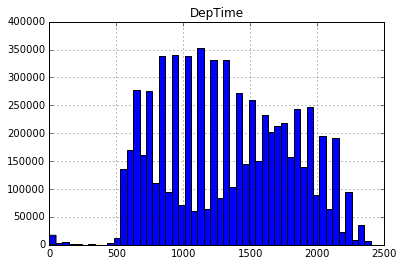

In [21]:
air.hist('DepTime', bins=50)

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

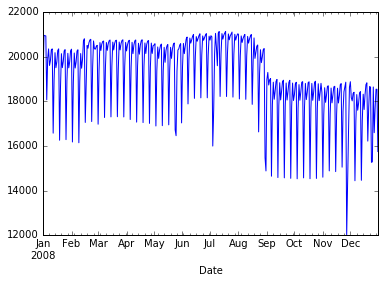

In [38]:
air['Date'] = pd.to_datetime(air.Year*10000 + 
                                    air.Month*100 + 
                                    air.DayofMonth, 
                            format='%Y%m%d')
air_by_date = air.groupby('Date')['FlightNum'].agg('count')
air_by_date.plot()

### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [23]:
guilty = pd.read_csv('../FBI/2013/table13.csv')
notguilty = pd.read_csv('../FBI/2013/table14.csv')
print(guilty.columns)

Index(['State', 'Agency type', 'Agency name', 'Race', 'Religion',
       'Sexual orientation', 'Ethnicity', 'Disability', 'Gender',
       'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter',
       '4th quarter', 'Population'],
      dtype='object')


In [24]:
print(notguilty.columns)

Index(['State', 'Agency Type', 'Agency Name', 'Q1', 'Q2', 'Q3', 'Q4',
       'Population'],
      dtype='object')


In [47]:
guilty['State'].unique()
notguilty['State'].unique()
guilty['State'].isin(notguilty['State'])
guilty['State'].isin(notguilty['State']).describe()

count         1826
mean      0.996166
std      0.0618135
min          False
25%              1
50%              1
75%              1
max           True
Name: State, dtype: object

**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [26]:
table = guilty.append(notguilty)
table

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,0,1,0,1,NaN,NaN,Florence,Cities,0,0,...,0,"39,481",NaN,NaN,NaN,NaN,2,0,0,Alabama
1,0,1,0,0,NaN,NaN,Hoover,Cities,0,0,...,0,"84,139",NaN,NaN,NaN,NaN,0,0,1,Alabama
2,1,0,1,0,NaN,NaN,Prattville,Cities,0,0,...,0,"35,154",NaN,NaN,NaN,NaN,2,0,0,Alabama
3,0,0,1,0,NaN,NaN,Tuscaloosa,Cities,0,0,...,0,"94,126",NaN,NaN,NaN,NaN,1,0,0,Alabama
4,2,3,3,0,NaN,NaN,Anchorage,Cities,0,0,...,0,"299,455",NaN,NaN,NaN,NaN,8,0,0,Alaska
5,1,0,0,NaN,NaN,NaN,Apache Junction,Cities,0,0,...,0,"36,626",NaN,NaN,NaN,NaN,1,0,0,Arizona
6,1,1,3,0,NaN,NaN,Avondale,Cities,0,1,...,0,"78,905",NaN,NaN,NaN,NaN,4,0,0,Arizona
7,0,1,0,0,NaN,NaN,Eagar,Cities,0,1,...,0,"5,034",NaN,NaN,NaN,NaN,0,0,0,Arizona
8,0,0,1,0,NaN,NaN,El Mirage,Cities,0,0,...,0,"32,837",NaN,NaN,NaN,NaN,1,0,0,Arizona
9,1,0,0,0,NaN,NaN,Gilbert,Cities,0,0,...,0,"225,232",NaN,NaN,NaN,NaN,1,0,0,Arizona


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [27]:
table1 = table.dropna(how = 'any')
table1

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State


В таблице удалились все строки, так как в изначальных таблицах различались столбцы. При использовании метода aрpend строки одной таблицы дописываются к другой, различие в столбах привело к наличию NaN в каждой строке

In [28]:
guilty.rename(columns={'Agency name':'Agency Name'}, inplace=True)
guilty.rename(columns={'Agency type':'Agency Type'}, inplace=True)
guilty.rename(columns={'1st quarter':'Q1'}, inplace=True)
guilty.rename(columns={'2nd quarter':'Q2'}, inplace=True)
guilty.rename(columns={'3rd quarter':'Q3'}, inplace=True)
guilty.rename(columns={'4th quarter':'Q4'}, inplace=True)
table2 = guilty.append(notguilty)
table2

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska
5,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,NaN,1,0,0,Arizona
6,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0,Arizona


In [29]:
table3 = table2.dropna(how = 'any')
table3

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska
6,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0,Arizona
10,Glendale,Cities,0,1,0,0,"234,006",2,0,3,2,2,3,1,Arizona


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [30]:
table3.set_index(['State','Agency Type'])

Agency Name  \
State         Agency Type                                                       
Alabama       Cities                                                 Florence   
              Cities                                                   Hoover   
              Cities                                               Prattville   
              Cities                                               Tuscaloosa   
Alaska        Cities                                                Anchorage   
Arizona       Cities                                                 Avondale   
              Cities                                                    Eagar   
              Cities                                                El Mirage   
              Cities                                                  Gilbert   
              Cities                                                 Glendale   
              Cities                                                 Maricopa   
              Cities                                                     Mesa   
              Cities                                                 Prescott   
              Cities                                               Scottsdale   
              Cities                                                    Tempe   
              Cities                                                   Tucson   
              Cities                                                     Yuma   
              Universities and Colleges           Northern Arizona University   
              Universities and Colleges                 University of Arizona   
Arkansas      Cities                                              Bentonville   
              Cities                                               Berryville   
              Cities                                                    Cabot   
              Cities                                                  England   
              Cities                                            Fairfield Bay   
              Cities                                               Fort Smith   
              Cities                                                   Gurdon   
              Cities                                                   Marion   
              Cities                                        North Little Rock   
              Cities                                               Pine Bluff   
              Cities                                                   Rogers   
...                                                                       ...   
Washington    Universities and Colleges  Washington State University, Pullman   
              Universities and Colleges         Western Washington University   
West_Virginia Cities                                            Barboursville   
              Cities                                                  Beckley   
              Cities                                               Buckhannon   
              Cities                                               Charleston   
              Cities                                                   Dunbar   
              Cities                                                 Fairmont   
              Cities                                               Huntington   
              Cities                                              Martinsburg   
              Cities                                               Morgantown   
              Cities                                              Moundsville   
              Cities                                                 Oak Hill   
              Cities                                                Wellsburg   
Wisconsin     Cities                                                   Algoma   
              Cities                                                 Appleton   
              Cities                                               Burlington   
              Ci

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [35]:
table4 = table3.loc[table3['State'].isin(['Arizona','Texas','Wyoming'])]
grouped_table4 = list(table4.groupby(['State','Agency Type']))
for i, j in grouped_table4:
    print(*i, j['Population'].sum())

Arizona Cities 78,9055,03432,837225,232234,00644,871456,15540,752225,523168,501525,48696,014
Arizona Universities and Colleges 25,99140,223
Texas Cities 859,180118,17717,6179,95022,15718,8736,9188,267314,5231,255,01522,652123,260679,700789,035131,76916,089235,68349,07565,8852,180,60638,20981,2736,095136,169146,86916,48016,717153,195275,79511,84196,6611,399,7252,69869,93716,233100,03364,97910,984
Texas Universities and Colleges 11,53010,89352,186
Wyoming Cities 31,884


## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Honda = pd.read_csv('../accord_sedan_training.csv')

In [3]:
Honda.columns

Index(['price', 'mileage', 'year', 'trim', 'engine', 'transmission'], dtype='object')

In [5]:
X = np.array([[1]*Honda.shape[0],Honda['mileage']]).T
Y = np.array(Honda['price'])

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [ ]:
# Здесь ваш код

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [ ]:
# Здесь ваш код

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [ ]:
# Здесь ваш код